Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline


In [2]:
df1= pd.read_csv('2015-building-energy-benchmarking.csv')
df1.head(1
         )
#df1.info()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [3]:
df1.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [4]:
df1.describe

<bound method NDFrame.describe of       OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2015        NonResidential                  Hotel   
1                 2      2015        NonResidential                  Hotel   
2                 3      2015        NonResidential                  Hotel   
3                 5      2015        NonResidential                  Hotel   
4                 8      2015        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyN

Drop Unnecessary Columns

In [18]:
df1=df1[['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors', 'SiteEUI(kBtu/sf)',
                    'GHGEmissionsIntensity(kgCO2e/ft2)']]

In [21]:
#Drop row with missing value
df1=df1.dropna()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 0 to 3339
Data columns (total 7 columns):
BuildingType                         3322 non-null object
PrimaryPropertyType                  3322 non-null object
Neighborhood                         3322 non-null object
YearBuilt                            3322 non-null int64
NumberofFloors                       3322 non-null float64
SiteEUI(kBtu/sf)                     3322 non-null float64
GHGEmissionsIntensity(kgCO2e/ft2)    3322 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 207.6+ KB


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,SiteEUI(kBtu/sf),GHGEmissionsIntensity(kgCO2e/ft2)
0,NonResidential,Hotel,DOWNTOWN,1927,12.0,78.9,2.64
1,NonResidential,Hotel,DOWNTOWN,1996,11.0,94.4,2.38
2,NonResidential,Hotel,DOWNTOWN,1969,41.0,96.6,1.92
3,NonResidential,Hotel,DOWNTOWN,1926,10.0,460.4,31.38
4,NonResidential,Hotel,DOWNTOWN,1980,18.0,120.1,4.02


In [ ]:
#Some PrimaryPropertyType has "/n" so we can clean them 
df1['PrimaryPropertyType']=df1['PrimaryPropertyType'].apply(lambda x:x.replace('\n',"" ))


In [30]:
#it's just some sample for lambda

In [22]:
def add_number(num):
    num= num+5
    return num

In [23]:
num= 3
add_number(num)

8

In [24]:
add_five = lambda num : num + 5

In [27]:

add_five(num = 3)

8

In [28]:
# Program to filter out only the even items from a list

my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(filter(lambda x: (x%2 == 0) , my_list))


new_list

[4, 6, 8, 12]

In [29]:
# Program to double each item in a list using map()

my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(map(lambda x: x * 2 , my_list))


print(new_list)

[2, 10, 8, 12, 16, 22, 6, 24]


In [31]:
#Find Median of EUI for different "PrimaryPropertyType"
Site_EUI=df1.groupby(['PrimaryPropertyType'])['SiteEUI(kBtu/sf)'].median().to_frame(name = 'Median SiteEUI(kBtu/sf)').reset_index()
Site_EUI.sort_values(by=['Median SiteEUI(kBtu/sf)'], inplace=True,ascending=False)
#Site_EUI

In [32]:
#Find Median of GHG Emissions Intensity for different "PrimaryPropertyType"
GHG_Emission=df1.groupby(['PrimaryPropertyType'])['GHGEmissionsIntensity(kgCO2e/ft2)'].median().to_frame(name = 'Median GHGEmissionsIntensity(kgCO2e/sf)').reset_index()
GHG_Emission.sort_values(by=['Median GHGEmissionsIntensity(kgCO2e/sf)'], inplace=True,ascending=False)
#GHG_Emission

Which Types of Buildings Use More Energy?

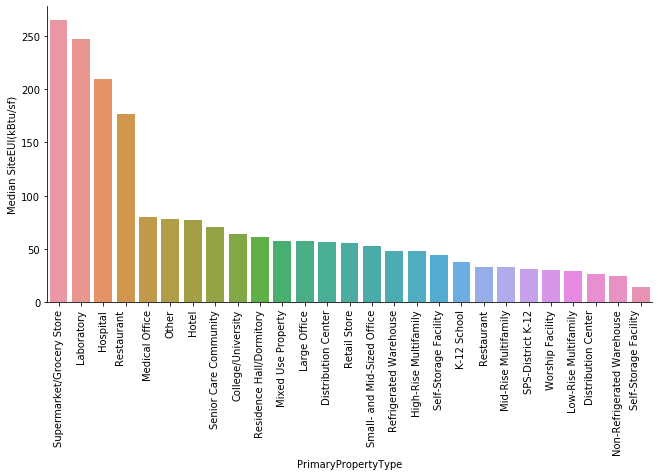

In [33]:
#Print Median EUI bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median SiteEUI(kBtu/sf)', data=Site_EUI,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

Which Types of Buildings Contribute Most to Greenhouse Gas Emissions?

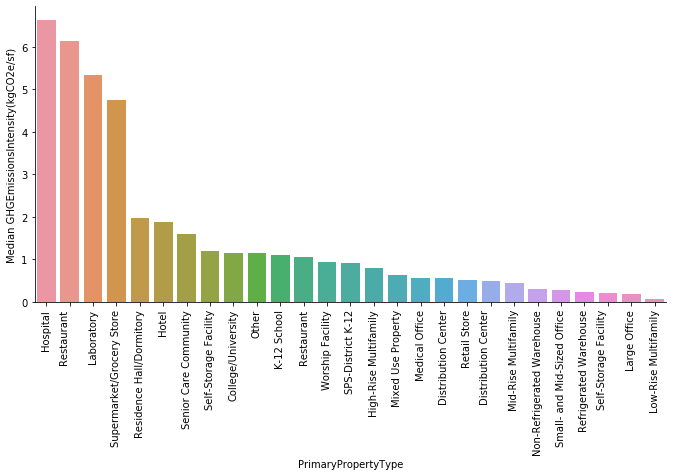

In [34]:
#Print Median GHG Emissions Intensity bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median GHGEmissionsIntensity(kgCO2e/sf)', data=GHG_Emission ,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

How Do the Different Buildings Relate to Greenhouse Gas Emissions?

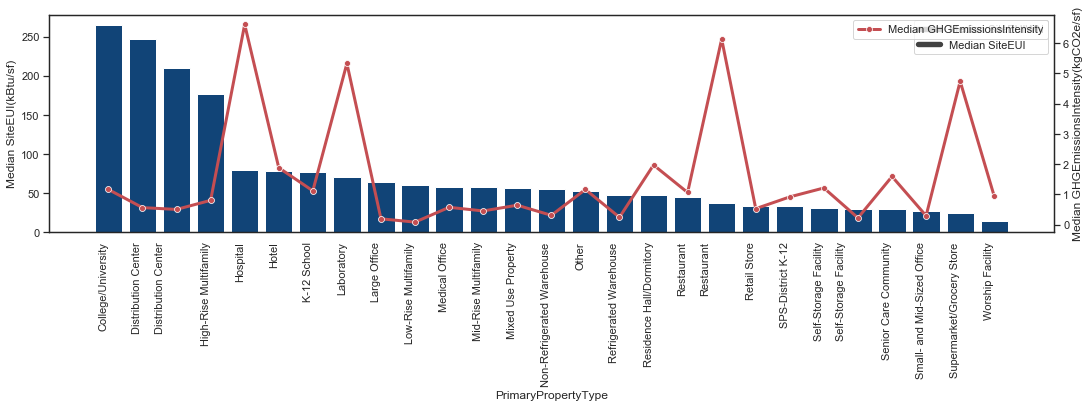

In [35]:
#Print Median EUI bar plot and Median GHG Emissions Intensity line plot for building Primary Property Type
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(18,4))
plt.xticks(rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(x=Site_EUI['PrimaryPropertyType'], 
             y=Site_EUI['Median SiteEUI(kBtu/sf)'], 
            color='#004488',ax=ax1
           )
plt.xticks(rotation=90)
sns.lineplot(x=GHG_Emission['PrimaryPropertyType'], 
             y=GHG_Emission['Median GHGEmissionsIntensity(kgCO2e/sf)'],
             color='r',
             marker="o",ax=ax2
            )

categorical_1=['Median SiteEUIWN','Median SiteEUI']
ax1.legend(categorical_1, facecolor='w')
categorical_2=['Median GHGEmissionsIntensity']
ax2.legend(categorical_2, facecolor='w')

plt.show()
sns.set()



Machine Learning Modeles,
Decision Tree Model

In [36]:
from sklearn import preprocessing

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics, model_selection

In [37]:
df1_ohe = df1
categorical_columns = ['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df1[col], prefix=col)
    df1_ohe = pd.concat((df1_ohe, col_ohe), axis=1).drop(col, axis=1)

In [38]:
columns=df1.columns

In [39]:
# Define X and y
X = df1_ohe.drop(['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis = 1)
y = df1_ohe['SiteEUI(kBtu/sf)'] 

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=2, test_size=0.30)

In [41]:
regressor = DecisionTreeRegressor(random_state=0)

In [42]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [43]:
predict=regressor.predict(X_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 27.21242680422219
MSE: 2712.6876188663496
RMSE: 52.08346780761002


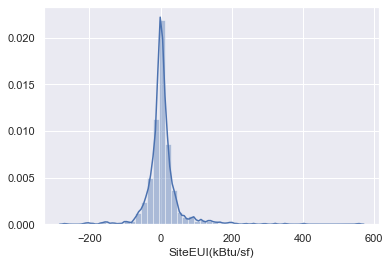

In [45]:
sns.distplot((y_test-predict),bins=50);

In [1]:
1=2

SyntaxError: cannot assign to literal (3293032332.py, line 1)

In [2]:
1=1

SyntaxError: cannot assign to literal (1748595019.py, line 1)

In [3]:
1==1

True

In [4]:
1==2

False

In [5]:
'a'='A'

SyntaxError: cannot assign to literal (4235703569.py, line 1)

In [6]:
'a'=='A'

False